In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Crop and fertilizer dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District_Name  4513 non-null   object 
 1   Soil_color     4513 non-null   object 
 2   Nitrogen       4513 non-null   int64  
 3   Phosphorus     4513 non-null   int64  
 4   Potassium      4513 non-null   int64  
 5   pH             4513 non-null   float64
 6   Rainfall       4513 non-null   int64  
 7   Temperature    4513 non-null   int64  
 8   Crop           4513 non-null   object 
 9   Fertilizer     4513 non-null   object 
 10  Link           4513 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 388.0+ KB


In [5]:
df.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo


In [6]:
df.drop(['District_Name','Link'], axis = 1, inplace = True)

In [7]:
df.describe(include="O")

,Soil_color,Crop,Fertilizer
count,4513,4513,4513
unique,7,16,19
top,Black,Sugarcane,Urea
freq,2260,1010,1364


In [8]:
df.describe()

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature
count,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000
mean,95.409927,54.341901,63.595170,6.715267,819.189010,25.915134
std,38.060648,16.551991,35.691911,0.625198,251.730813,5.897328
min,20.000000,10.000000,5.000000,5.500000,300.000000,10.000000
25%,60.000000,40.000000,40.000000,6.000000,600.000000,20.000000
50%,105.000000,55.000000,55.000000,6.500000,800.000000,25.000000
75%,125.000000,65.000000,75.000000,7.000000,1000.000000,30.000000
max,150.000000,90.000000,150.000000,8.500000,1700.000000,40.000000


<Axes: >

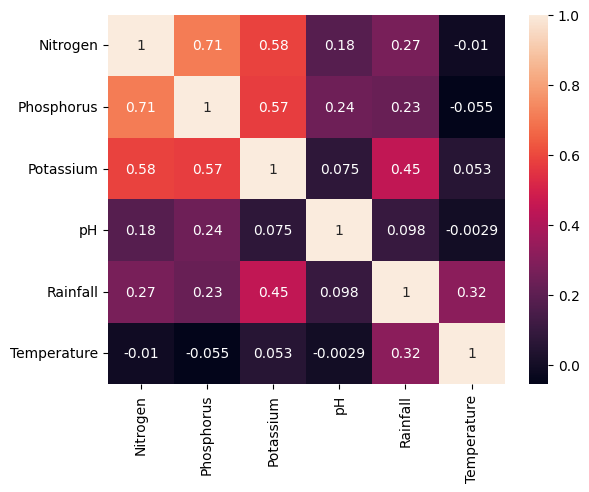

In [9]:
sns.heatmap(df.corr(numeric_only = True), annot = True)

In [10]:
for i in df.select_dtypes('O'):
    print(df[i].value_counts())

Soil_color
Black            2260
Red               744
Dark Brown        659
Red               480
Reddish Brown     265
Light Brown        54
Medium Brown       51
Name: count, dtype: int64
Crop
Sugarcane    1010
Wheat         859
Cotton        650
Jowar         394
Maize         350
Rice          309
Groundnut     177
Tur           126
Ginger        125
Grapes        125
Urad           99
Moong          99
Gram           78
Turmeric       55
Soybean        45
Masoor         12
Name: count, dtype: int64
Fertilizer
Urea                      1364
DAP                        667
MOP                        571
19:19:19 NPK               480
SSP                        417
Magnesium Sulphate         215
10:26:26 NPK               156
50:26:26 NPK               124
Chilated Micronutrient     108
12:32:16 NPK               106
Ferrous Sulphate            68
13:32:26 NPK                66
Ammonium Sulphate           50
10:10:10 NPK                50
Hydrated Lime               25
White Potash  

In [11]:
for i in df.select_dtypes('O'):
    df[i] = df[i].str.strip()

In [12]:
for i in df.select_dtypes('O'):
    print(df[i].value_counts())

Soil_color
Black            2260
Red              1224
Dark Brown        659
Reddish Brown     265
Light Brown        54
Medium Brown       51
Name: count, dtype: int64
Crop
Sugarcane    1010
Wheat         859
Cotton        650
Jowar         394
Maize         350
Rice          309
Groundnut     177
Tur           126
Ginger        125
Grapes        125
Urad           99
Moong          99
Gram           78
Turmeric       55
Soybean        45
Masoor         12
Name: count, dtype: int64
Fertilizer
Urea                      1364
DAP                        667
MOP                        571
19:19:19 NPK               480
SSP                        417
Magnesium Sulphate         215
10:26:26 NPK               156
50:26:26 NPK               124
Chilated Micronutrient     108
12:32:16 NPK               106
Ferrous Sulphate            68
13:32:26 NPK                66
Ammonium Sulphate           50
10:10:10 NPK                50
Hydrated Lime               25
White Potash                19
20:20

In [13]:
df.duplicated().sum()

0

In [14]:
df.to_csv('crop recommendation.csv', index = False)

In [15]:
# encoding

from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
df['soil_color_encode'] = le.fit_transform(df['Soil_color'])
df['Crop_encode'] = le.fit_transform(df['Crop']) 
df['Fertilizer_encode'] = le.fit_transform(df['Fertilizer'])  

In [16]:
df.head()

,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,soil_color_encode,Crop_encode,Fertilizer_encode
0,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,0,11,17
1,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,0,11,17
2,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,0,11,17
3,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,0,11,17
4,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,0,11,17


In [17]:
dict(zip(df['soil_color_encode'],df['Soil_color']))

{0: 'Black',
 4: 'Red',
 3: 'Medium Brown',
 1: 'Dark Brown',
 2: 'Light Brown',
 5: 'Reddish Brown'}

In [18]:
dict(zip(df['Crop_encode'],df['Crop']))


{11: 'Sugarcane',
 5: 'Jowar',
 0: 'Cotton',
 9: 'Rice',
 15: 'Wheat',
 4: 'Groundnut',
 6: 'Maize',
 12: 'Tur',
 14: 'Urad',
 8: 'Moong',
 2: 'Gram',
 7: 'Masoor',
 10: 'Soybean',
 1: 'Ginger',
 13: 'Turmeric',
 3: 'Grapes'}

In [19]:
dict(zip(df['Fertilizer_encode'],df['Fertilizer']))

{17: 'Urea',
 10: 'DAP',
 13: 'MOP',
 1: '10:26:26 NPK',
 15: 'SSP',
 14: 'Magnesium Sulphate',
 3: '13:32:26 NPK',
 2: '12:32:16 NPK',
 7: '50:26:26 NPK',
 5: '19:19:19 NPK',
 9: 'Chilated Micronutrient',
 4: '18:46:00 NPK',
 16: 'Sulphur',
 6: '20:20:20 NPK',
 8: 'Ammonium Sulphate',
 11: 'Ferrous Sulphate',
 18: 'White Potash',
 0: '10:10:10 NPK',
 12: 'Hydrated Lime'}

In [20]:
df.head(2)

,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,soil_color_encode,Crop_encode,Fertilizer_encode
0,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,0,11,17
1,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,0,11,17


In [21]:
# drop the columns
df.drop(['Soil_color','Fertilizer','Crop','Fertilizer_encode'], axis = 1, inplace = True) 

In [22]:
X = df.drop('Crop_encode',axis = 1)
y = df['Crop_encode']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 1000)

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(multi_class = 'ovr')

lg.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [24]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the training data
y_train_pred = lg.predict(X_train)

# Predict on the test data
y_test_pred = lg.predict(X_test)
print('Logistic Regression model:')
# Calculate and print the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

Logistic Regression model:
Training Accuracy: 0.75
Test Accuracy: 0.75


In [25]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.69      0.67       152
           1       1.00      0.93      0.96        29
           2       0.67      0.36      0.47        11
           3       1.00      1.00      1.00        26
           4       0.65      0.54      0.59        28
           5       0.50      0.58      0.54        74
           6       0.95      1.00      0.97        71
           7       0.00      0.00      0.00         3
           8       0.47      0.53      0.50        15
           9       0.68      0.48      0.57        54
          10       0.75      0.82      0.78        11
          11       0.90      0.89      0.90       199
          12       0.79      0.58      0.67        26
          13       1.00      0.50      0.67        12
          14       0.00      0.00      0.00        21
          15       0.68      0.82      0.74       171

    accuracy                           0.75       903
   macro avg       0.67   

In [26]:
# # Define a function to train, predict and print accuracy for each model
# def evaluate_model(model, model_name):
#     # Train the model
#     model.fit(X_train, y_train)

#     # Predict on training and test data
#     y_train_pred = model.predict(X_train)
#     y_test_pred = model.predict(X_test)

#     # Calculate accuracies
#     train_accuracy = accuracy_score(y_train, y_train_pred)
#     test_accuracy = accuracy_score(y_test, y_test_pred)

#     # Print results
#     print(f"{model_name} - Training Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

In [27]:
# pip install xgboost

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss


In [29]:

# #logistic regression
# lg=LogisticRegression()
# evaluate_model(lg,'LogisticRegression')
# # K-Nearest Neighbors
# knn = KNeighborsClassifier(n_neighbors=3)
# evaluate_model(knn, "K-Nearest Neighbors")

# # Random Forest
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# evaluate_model(rf, "Random Forest")

# # Gradient Boosting
# gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
# evaluate_model(gb, "Gradient Boosting")

# # XGBoost
# xgboost = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
# evaluate_model(xgboost, "XGBoost")

# # Support Vector Machine
# svm = SVC(kernel='linear', random_state=42)
# evaluate_model(svm, "Support Vector Machine")
# # Naive Bayes
# nb = GaussianNB()
# evaluate_model(nb, "Naive Bayes")

In [30]:
# Define a function to train, predict, calculate accuracy, and calculate log loss for each model
def evaluate_model(model, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Predict probabilities for log loss calculation (required by log_loss)
    if hasattr(model, "predict_proba"):
        y_train_pred_prob = model.predict_proba(X_train)
        y_test_pred_prob = model.predict_proba(X_test)
    else:
        # For models that don't have predict_proba (like SVC), use decision function instead
        y_train_pred_prob = model.decision_function(X_train)
        y_test_pred_prob = model.decision_function(X_test)
        y_train_pred_prob = softmax(y_train_pred_prob)  # Convert to probabilities
        y_test_pred_prob = softmax(y_test_pred_prob)

    # Calculate log loss (cross-entropy loss)
    train_loss = log_loss(y_train, y_train_pred_prob)
    test_loss = log_loss(y_test, y_test_pred_prob)

    # Print results
    print(f"{model_name} - Training Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print(f"{model_name} - Training Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}\n")

# Logistic Regression
lg = LogisticRegression(max_iter=1000, random_state=42)
evaluate_model(lg, 'Logistic Regression')

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
evaluate_model(knn, "K-Nearest Neighbors")

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf, "Random Forest")

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
evaluate_model(gb, "Gradient Boosting")

# XGBoost
xgboost = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
evaluate_model(xgboost, "XGBoost")

# Support Vector Machine
svm = SVC(kernel='linear', random_state=42, probability=True)
evaluate_model(svm, "Support Vector Machine")

# Naive Bayes
nb = GaussianNB()
evaluate_model(nb, "Naive Bayes")

Logistic Regression - Training Accuracy: 0.7620, Test Accuracy: 0.7719
Logistic Regression - Training Loss: 0.6661, Test Loss: 0.6685

K-Nearest Neighbors - Training Accuracy: 0.9917, Test Accuracy: 0.9546
K-Nearest Neighbors - Training Loss: 0.0452, Test Loss: 0.4048

Random Forest - Training Accuracy: 1.0000, Test Accuracy: 0.9967
Random Forest - Training Loss: 0.0188, Test Loss: 0.0506

Gradient Boosting - Training Accuracy: 1.0000, Test Accuracy: 0.9967
Gradient Boosting - Training Loss: 0.0165, Test Loss: 0.0228

XGBoost - Training Accuracy: 1.0000, Test Accuracy: 0.9989
XGBoost - Training Loss: 0.0060, Test Loss: 0.0109

Support Vector Machine - Training Accuracy: 0.9150, Test Accuracy: 0.9147
Support Vector Machine - Training Loss: 0.2942, Test Loss: 0.3243

Naive Bayes - Training Accuracy: 0.7884, Test Accuracy: 0.7841
Naive Bayes - Training Loss: 0.6678, Test Loss: 0.6601



In [31]:
# from sklearn.model_selection import GridSearchCV

In [32]:
# # Define a function to perform GridSearchCV and evaluate the model
# def evaluate_model(model, param_grid, model_name):
#     # Perform GridSearchCV
#     grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
#     grid_search.fit(X_train, y_train)

#     # Best estimator
#     best_model = grid_search.best_estimator_

#     # Predict on training and test data
#     y_train_pred = best_model.predict(X_train)
#     y_test_pred = best_model.predict(X_test)
#     # Calculate accuracies
#     train_accuracy = accuracy_score(y_train, y_train_pred)
#     test_accuracy = accuracy_score(y_test, y_test_pred)

#     # Print results
#     print(f"{model_name} - Best Params: {grid_search.best_params_}")
#     print(f"{model_name} - Training Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")


In [33]:
# # K-Nearest Neighbors
# knn = KNeighborsClassifier()
# knn_param_grid = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
# }
# evaluate_model(knn, knn_param_grid, "K-Nearest Neighbors")

# # Random Forest
# rf = RandomForestClassifier(random_state=42)
# rf_param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10]
# }
# evaluate_model(rf, rf_param_grid, "Random Forest")

# # Gradient Boosting
# gb = GradientBoostingClassifier(random_state=42)
# gb_param_grid = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5]
# }
# evaluate_model(gb, gb_param_grid, "Gradient Boosting")

# # XGBoost
# xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
# xgboost_param_grid = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5]
# }
# evaluate_model(xgboost, xgboost_param_grid, "XGBoost")

# # Support Vector Machine
# svm = SVC(random_state=42)
# svm_param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto']
# }
# evaluate_model(svm, svm_param_grid, "Support Vector Machine")

# # Naive Bayes (no hyperparameters to tune using GridSearchCV)
# nb = GaussianNB()
# # For Naive Bayes, we do not perform grid search since it has no hyperparameters
# nb.fit(X_train, y_train)
# y_train_pred = nb.predict(X_train)
# y_test_pred = nb.predict(X_test)
# train_accuracy = accuracy_score(y_train, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print(f"Naive Bayes - Training Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")

In [34]:
import pickle 
with open('model.pickle','wb') as model_file:
    pickle.dump(knn,model_file)

In [35]:
X_test

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,soil_color_encode
785,110,80,55,6.0,500,15,1
2076,80,40,20,7.5,600,30,0
4049,100,50,55,5.5,700,40,0
2883,55,60,80,6.0,900,20,0
285,145,50,50,7.0,800,25,4
...,...,...,...,...,...,...,...
3711,120,60,50,7.5,900,15,0
3271,125,80,90,7.0,800,25,5
3034,70,60,60,6.0,600,20,0
3811,80,60,45,7.0,800,25,4
